In [6]:
## Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling1D
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

In [2]:
# read files
train = pd.read_csv(r'C:\Users\lkhse\OneDrive\Desktop\SC4001_project_2\mitbih_train.csv', header=None)
test = pd.read_csv(r'C:\Users\lkhse\OneDrive\Desktop\SC4001_project_2\mitbih_test.csv', header=None)

X_train, y_train = train.iloc[:, :187].values, train.iloc[:, 187].values
X_test, y_test = test.iloc[:, :187].values, test.iloc[:, 187].values

# Reshape the input data to (samples, 187, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [3]:
# set up CNN 
CNN_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(187, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # Added L2 regularization
    Dropout(0.5),  # Regularization

    Dense(5, activation='softmax')
])

CNN_model.summary()

C:\Users\lkhse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 185, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 185, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 92, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 92, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 90, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 90, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 45, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 45, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2880)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       368,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 376,133 (1.43 MB)

 Trainable params: 375,941 (1.43 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
#trainning
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Compile the model with class weights
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model with class weights
history = CNN_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    class_weight=class_weights 
)

Epoch 1/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5598 - loss: 2.5083 - val_accuracy: 0.7410 - val_loss: 1.2633
Epoch 2/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6977 - loss: 1.2072 - val_accuracy: 0.7760 - val_loss: 1.0630
Epoch 3/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7567 - loss: 0.9431 - val_accuracy: 0.8020 - val_loss: 1.0107
Epoch 4/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7622 - loss: 0.9315 - val_accuracy: 0.8647 - val_loss: 0.8242
Epoch 5/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7860 - loss: 0.8426 - val_accuracy: 0.8710 - val_loss: 0.7734
Epoch 6/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7860 - loss: 0.8268 - val_accuracy: 0.8009 - val_loss: 0.9129
Epoch 7/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7869 - loss: 0.8281 - val_accuracy: 0.7878 - val_loss: 0.9192
Epoch 8/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7807 - loss: 0

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8676 - loss: 0.7857
Test accuracy: 0.8710


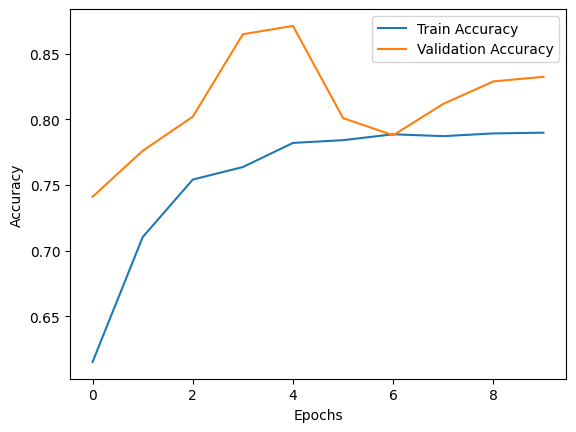

In [ ]:
# get accurary and plot training curve
test_loss, test_accuracy = CNN_model.evaluate(X_test, y_test)

print(f"Test accuracy: {test_accuracy:.4f}")

#Plot training history to visualize improvement

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Generate the classification report
y_pred_probs = CNN_model.predict(X_test)  # Get probabilities

# Get the predicted class labels
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class predictions

print(classification_report(y_test, y_pred))

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.92     18118
         1.0       0.31      0.76      0.44       556
         2.0       0.64      0.88      0.74      1448
         3.0       0.15      0.90      0.26       162
         4.0       0.92      0.95      0.94      1608

    accuracy                           0.87     21892
   macro avg       0.60      0.87      0.66     21892
weighted avg       0.93      0.87      0.89     21892



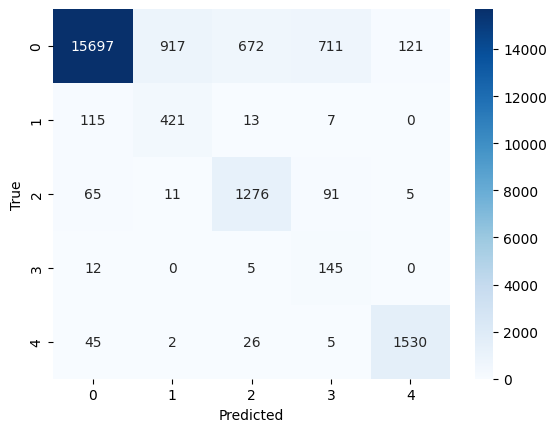

In [7]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Experimenting to improve results 

C:\Users\lkhse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 185, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 185, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 92, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 92, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 90, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 90, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 45, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 45, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     1,474,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,829 (5.73 MB)

 Trainable params: 1,501,445 (5.73 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5778 - loss: 4.1357 - val_accuracy: 0.7132 - val_loss: 1.7486
Epoch 2/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7062 - loss: 1.4927 - val_accuracy: 0.6340 - val_loss: 1.5929
Epoch 3/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7430 - loss: 1.2136 - val_accuracy: 0.8532 - val_loss: 0.8892
Epoch 4/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7834 - loss: 0.9924 - val_accuracy: 0.8629 - val_loss: 0.9174
Epoch 5/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7733 - loss: 1.0054 - val_accuracy: 0.7990 - val_loss: 1.1263
Epoch 6/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7837 - loss: 0.9667 - val_accuracy: 0.7654 - val_loss: 1.0471
Epoch 7/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7849 - loss: 0.9294 - val_accuracy: 0.8000 - val_loss: 1.0375
Epoch 8/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7816 - loss: 0

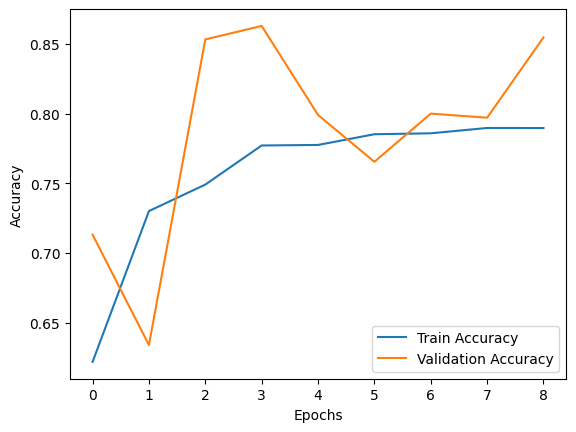

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92     18118
         1.0       0.34      0.72      0.46       556
         2.0       0.82      0.80      0.81      1448
         3.0       0.10      0.91      0.18       162
         4.0       0.81      0.97      0.89      1608

    accuracy                           0.86     21892
   macro avg       0.61      0.85      0.65     21892
weighted avg       0.94      0.86      0.89     21892



In [7]:
## testing with an additional latyer for cnn
train = pd.read_csv(r'C:\Users\lkhse\OneDrive\Desktop\SC4001_project_2\mitbih_train.csv', header=None)
test = pd.read_csv(r'C:\Users\lkhse\OneDrive\Desktop\SC4001_project_2\mitbih_test.csv', header=None)

X_train, y_train = train.iloc[:, :187].values, train.iloc[:, 187].values
X_test, y_test = test.iloc[:, :187].values, test.iloc[:, 187].values

# Reshape the input data to (samples, 187, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

CNN_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(187, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

CNN_model.summary()

#trainning
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Compile the model with class weights
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model with class weights
history = CNN_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    class_weight=class_weights 
)

# get accurary and plot training curve
test_loss, test_accuracy = CNN_model.evaluate(X_test, y_test)

print(f"Test accuracy: {test_accuracy:.4f}")

#Plot training history to visualize improvement

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Generate the classification report
y_pred_probs = CNN_model.predict(X_test)  # Get probabilities

# Get the predicted class labels
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class predictions

print(classification_report(y_test, y_pred))

In [8]:
## edited to try improve the scores for class 1 and 3 by changing the weights
from sklearn.metrics import classification_report

initial_class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(initial_class_weights))

# Modify weights for classes 1 and 3 to emphasize them more
class_weights[1] *= 1.5  # Adjust multiplier based on experimentation
class_weights[3] *= 1.5

print("Adjusted class weights:", class_weights)

# Compile the model with updated class weights
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model using the modified class weights
history = CNN_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    class_weight=class_weights
)

# Evaluate and print metrics
test_loss, test_accuracy = CNN_model.evaluate(X_test, y_test)
print(f"Test accuracy after reweighting: {test_accuracy:.4f}")

y_pred_probs = CNN_model.predict(X_test)  # Get probabilities

# Get the predicted class labels
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class predictions

# Generate the classification report
print(classification_report(y_test, y_pred))

Adjusted class weights: {0: 0.24162492583240192, 1: 11.815654520917679, 2: 3.0253628196268143, 3: 40.97691107644306, 4: 2.7228735810915876}
Epoch 1/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7353 - loss: 1.1430 - val_accuracy: 0.7196 - val_loss: 1.3339
Epoch 2/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7190 - loss: 1.1313 - val_accuracy: 0.6729 - val_loss: 1.4199
Epoch 3/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7279 - loss: 1.0816 - val_accuracy: 0.7655 - val_loss: 1.3095
Epoch 4/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7298 - loss: 1.1628 - val_accuracy: 0.7378 - val_loss: 1.3529
Epoch 5/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7360 - loss: 1.1123 - val_accuracy: 0.7463 - val_loss: 1.1618
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6847 - loss: 1.4292
Test accuracy after reweighting: 0.7196
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   sup

In [9]:
# data augmenting for class 1 and 3
from sklearn.utils import shuffle

# Load your data
train = pd.read_csv(r'C:\Users\lkhse\OneDrive\Desktop\SC4001_project_2\mitbih_train.csv', header=None)
test = pd.read_csv(r'C:\Users\lkhse\OneDrive\Desktop\SC4001_project_2\mitbih_test.csv', header=None)

# Split data into features (X) and labels (y)
X_train, y_train = train.iloc[:, :187].values, train.iloc[:, 187].values
X_test, y_test = test.iloc[:, :187].values, test.iloc[:, 187].values

# Reshape the data to (samples, 187, 1) for CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Augmentation Functions
def time_shift(signal, max_shift=5):
    """Shift the signal by a random amount between -max_shift and +max_shift."""
    shift = np.random.randint(-max_shift, max_shift)
    return np.roll(signal, shift, axis=0)

def add_noise(signal, noise_factor=0.01):
    """Add random noise to the signal."""
    noise = np.random.normal(0, noise_factor, signal.shape)
    return signal + noise

def scale_signal(signal, scale_factor=1.2):
    """Scale the signal by a random factor."""
    scale = np.random.uniform(1, scale_factor)
    return signal * scale

def jitter_signal(signal, jitter_factor=0.05):
    """Jitter the signal by adding random offsets."""
    jitter = np.random.uniform(-jitter_factor, jitter_factor, signal.shape)
    return signal + jitter

# Augmenting data only for class 1 and 3
def augment_class_data(X, y, class_label, augmentation_func, num_augmented_samples=5):
    """Augment the data for a specific class."""
    augmented_X = []
    augmented_y = []
    
    # Get indices for the specified class label
    class_indices = np.where(y == class_label)[0]
    
    for idx in class_indices:
        augmented_X.append(X[idx])
        augmented_y.append(y[idx])
        
        for _ in range(num_augmented_samples):
            # Apply the augmentation function
            augmented_sample = augmentation_func(X[idx])
            augmented_X.append(augmented_sample)
            augmented_y.append(y[idx])

    return np.array(augmented_X), np.array(augmented_y)

# Apply augmentation to class 1 and class 3 only
augmented_X_train_class_1, augmented_y_train_class_1 = augment_class_data(X_train, y_train, 1, time_shift, num_augmented_samples=3)
augmented_X_train_class_1, augmented_y_train_class_1 = augment_class_data(augmented_X_train_class_1, augmented_y_train_class_1, 1, add_noise, num_augmented_samples=3)
augmented_X_train_class_1, augmented_y_train_class_1 = augment_class_data(augmented_X_train_class_1, augmented_y_train_class_1, 1, scale_signal, num_augmented_samples=3)
augmented_X_train_class_1, augmented_y_train_class_1 = augment_class_data(augmented_X_train_class_1, augmented_y_train_class_1, 1, jitter_signal, num_augmented_samples=3)

augmented_X_train_class_3, augmented_y_train_class_3 = augment_class_data(X_train, y_train, 3, time_shift, num_augmented_samples=3)
augmented_X_train_class_3, augmented_y_train_class_3 = augment_class_data(augmented_X_train_class_3, augmented_y_train_class_3, 3, add_noise, num_augmented_samples=3)
augmented_X_train_class_3, augmented_y_train_class_3 = augment_class_data(augmented_X_train_class_3, augmented_y_train_class_3, 3, scale_signal, num_augmented_samples=3)
augmented_X_train_class_3, augmented_y_train_class_3 = augment_class_data(augmented_X_train_class_3, augmented_y_train_class_3, 3, jitter_signal, num_augmented_samples=3)
# Concatenate augmented data with the original dataset
augmented_X_train = np.concatenate((X_train, augmented_X_train_class_1, augmented_X_train_class_3), axis=0)
augmented_y_train = np.concatenate((y_train, augmented_y_train_class_1, augmented_y_train_class_3), axis=0)

# Shuffle the augmented dataset to ensure randomness
augmented_X_train, augmented_y_train = shuffle(augmented_X_train, augmented_y_train)


In [8]:
CNN_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(187, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),

    Dense(5, activation='softmax')
])

CNN_model.summary()

# Compile the model
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

C:\Users\lkhse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 185, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 185, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 92, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 92, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 90, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 90, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 45, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 45, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2880)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       368,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 376,133 (1.43 MB)

 Trainable params: 375,941 (1.43 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:

# Calculate class weights after augmentation
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(augmented_y_train), y=augmented_y_train)
class_weights = dict(enumerate(class_weights))

# Print class weights to see the distribution
print(f"Class weights: {class_weights}")


Class weights: {0: 2.2650108319189743, 1: 0.28731741555825113, 2: 28.35998617829993, 3: 0.9964221759531859, 4: 25.52442854921474}


In [12]:
# Train the model on the augmented data
history = CNN_model.fit(
    augmented_X_train, augmented_y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    class_weight=class_weights  # Apply class weights during training
)


Epoch 1/50
25649/25649 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - accuracy: 0.8639 - loss: 1.2365 - val_accuracy: 0.9158 - val_loss: 0.5635
Epoch 2/50
25649/25649 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 0.9078 - loss: 0.5681 - val_accuracy: 0.9016 - val_loss: 0.5507
Epoch 3/50
25649/25649 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - accuracy: 0.9104 - loss: 0.5326 - val_accuracy: 0.8793 - val_loss: 0.5923
Epoch 4/50
25649/25649 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - accuracy: 0.9112 - loss: 0.5128 - val_accuracy: 0.9314 - val_loss: 0.4607
Epoch 5/50
25649/25649 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - accuracy: 0.9106 - loss: 0.4827 - val_accuracy: 0.9179 - val_loss: 0.4858
Epoch 6/50
25649/25649 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - accuracy: 0.9130 - loss: 0.4834 - val_accuracy: 0.9068 - val_loss: 0.5462
Epoch 7/50
25649/25649 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.9135 - loss: 0.4826 - val_accuracy: 0.9319 - val_loss: 0.4328
Epoch 8/50
25649/25649 ━━━━━━━━━━━━━━━━━━━━ 86s 3ms/step - accuracy: 

In [13]:
# Evaluate the model on the test set
test_loss, test_accuracy = CNN_model.evaluate(X_test, y_test)

# Print test accuracy
print(f"Test accuracy: {test_accuracy:.4f}")


685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9572 - loss: 0.3626
Test accuracy: 0.9319


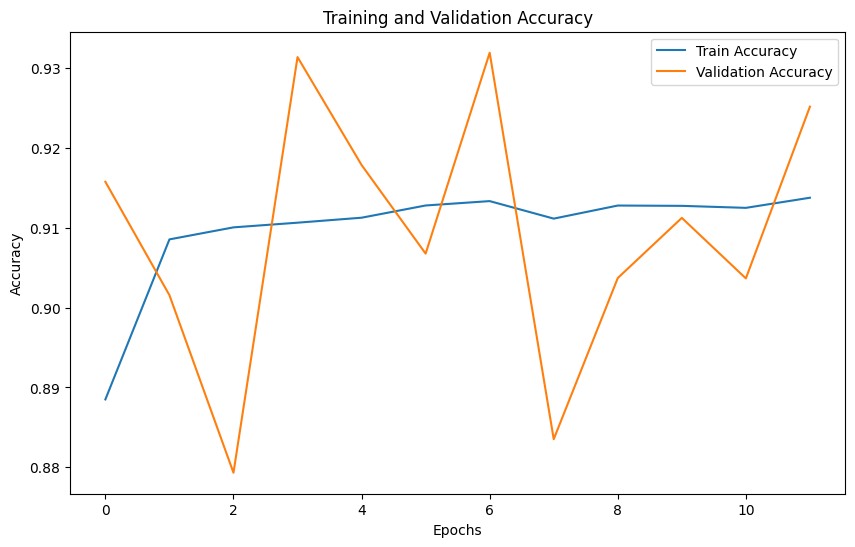

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [15]:
# Generate predictions on the test data
y_pred_probs = CNN_model.predict(X_test)  # Get probabilities

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the classification report
print(classification_report(y_test, y_pred))


685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     18118
         1.0       0.89      0.06      0.11       556
         2.0       0.63      0.95      0.76      1448
         3.0       1.00      0.10      0.19       162
         4.0       0.98      0.95      0.96      1608

    accuracy                           0.93     21892
   macro avg       0.89      0.61      0.60     21892
weighted avg       0.94      0.93      0.92     21892

